In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_excel("data.xlsx").to_numpy()

In [3]:
np.random.seed(8258)
dataset1 = np.random.permutation(dataset)
x = dataset1[:,0:-1]
y = dataset1[:,-1]

In [4]:
def spliter(k,x, y):
    tedad = len(x)//k
    testX = []
    testY= []
    trainX = []
    trainY = []
    for i in range(k):
        start = int(i * tedad)
        end  = int((i+1)*tedad)
        testX.append(x[start:end])
        testY.append(y[start:end])
        trainX.append(np.concatenate((x[:start],x[end:])))
        trainY.append(np.concatenate((y[:start],y[end:])))
    return trainX, trainY , testX, testY
        
    

In [5]:
x_train , y_train , x_test , y_test = spliter(10,x,y)

In [6]:
# def rmse(y_hat, ytest):
#     mse = np.sum(np.power(ytest-y_hat,2))/len(y_hat)
#     return np.sqrt(mse)

In [7]:
def r2Score(y_hat, ytest):
    y_mean = sum(ytest)/len(ytest)
    tss = sum((y - y_mean)**2 for y in ytest)
    rss = sum((y- y1)**2 for y,y1 in zip(ytest,y_hat))
    r2 = 1 - (rss / tss)
    return r2

In [8]:
def accurancy(y_hat, ytest):
    correct = 0
    for i in range(len(y_hat)):
        if y_hat[i] == ytest[i]:
            correct +=1
    acc = correct/len(y_hat)
    return acc
    

In [9]:
def euclidean(x1,x2):
    d = np.sqrt(np.sum(np.power(x1 - x2,2)))
    return d

In [10]:
def manhatan(x1,x2):
    d = np.sum(np.abs(x1-x2))
    return d

In [11]:
def minkowski4(x1,x2,p=4):
    d = np.power((np.sum(np.power(np.abs(x1-x2),p))),1/p)
    return d

In [12]:
def minkowski2(x1,x2,p=1/2):
    d = np.power((np.sum(np.power(np.abs(x1-x2),p))),1/p)
    return d

In [13]:
def cosine_similarity(x1,x2):   
    dot_product = np.dot(x1, x2)
    norm_A = np.linalg.norm(x1)
    norm_B = np.linalg.norm(x2)
    cosine = dot_product / (norm_A * norm_B)
    return 1/cosine


In [14]:
def voting(arr):
    arr_np = np.array(arr)
    unique, counts = np.unique(arr_np, return_counts=True)
    most_repeated_index = np.argmax(counts)
    most_repeated = unique[most_repeated_index]
    return most_repeated

In [15]:
def kfolds(x_train , y_train , x_test , y_test,method,n_neighbors=5,scoring =accurancy):
    error = []
    for i in range(10):
        
        xtrain , xtest , ytrain , ytest= np.array(x_train[i]) , np.array(x_test[i]) , np.array(y_train[i]) , np.array(y_test[i])
        y_hat = []
        distance = [method(xtest[j],xtrain[k]) for j in range(len(xtest)) for k in range(len(xtrain))]
        distances = np.array(distance).reshape(xtest.shape[0], xtrain.shape[0])
        for k in range(len(xtest)):
            sorty = [j for _,j in sorted(zip(distances[k],ytrain))]
            select = sorty[:n_neighbors]
            y_hat.append(voting(select))
        error.append(scoring(y_hat, ytest))
    kfold_scores = np.sum(error)/10
    return kfold_scores, error

In [16]:
euclidean_scores , euclidean_error = kfolds(x_train , y_train , x_test , y_test,euclidean)


In [17]:
manhatan_scores , manhatan_error = kfolds(x_train , y_train , x_test , y_test,manhatan)

In [18]:
minkovski4_scores , minkovski4_error = kfolds(x_train , y_train , x_test , y_test,minkowski4)

In [19]:
minkovski2_scores , minkovski2_error = kfolds(x_train , y_train , x_test , y_test,minkowski2)

In [20]:
cosine_scores , cosine_error = kfolds(x_train , y_train , x_test , y_test,cosine_similarity)

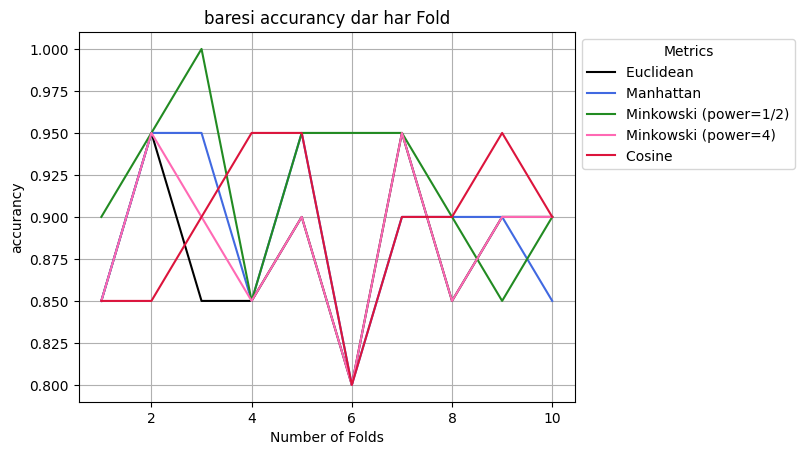

In [21]:

folds= np.arange(1,11)
plt.plot(folds, euclidean_error, color='black', label='Euclidean ')
plt.plot(folds, manhatan_error, color='royalblue', label='Manhattan ')
plt.plot(folds, minkovski2_error, color='forestgreen', label='Minkowski (power=1/2)')
plt.plot(folds, minkovski4_error, color='hotpink', label='Minkowski (power=4)')
plt.plot(folds, cosine_error, color='crimson', label='Cosine ')

plt.xlabel('Number of Folds')
plt.ylabel('accurancy')
plt.title('baresi accurancy dar har Fold')
plt.legend(title='Metrics', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True) 

plt.show()


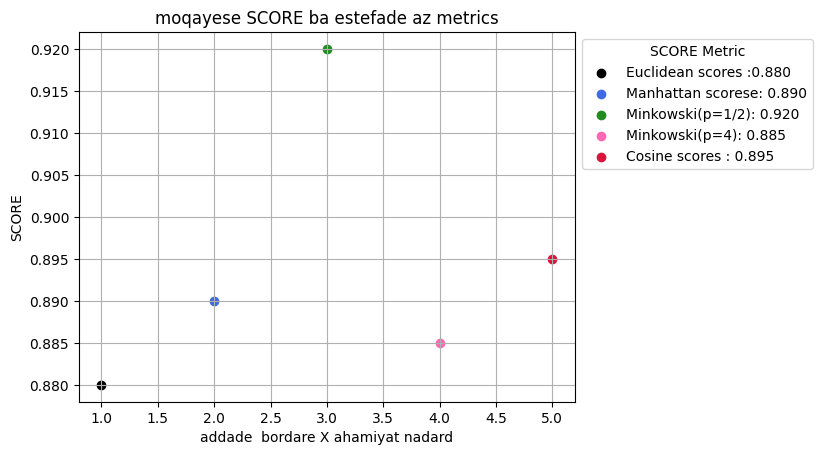

In [22]:
plt.scatter(1, euclidean_scores, color='black', label=f'Euclidean scores :{euclidean_scores:0.3f}')
plt.scatter(2, manhatan_scores, color='royalblue', label=f'Manhattan scorese: {manhatan_scores:0.3f}')
plt.scatter(3, minkovski2_scores, color='forestgreen', label=f'Minkowski(p=1/2): {minkovski2_scores:0.3f}')
plt.scatter(4, minkovski4_scores, color='hotpink', label=f'Minkowski(p=4): {minkovski4_scores:0.3f} ')
plt.scatter(5, cosine_scores, color='crimson', label=f'Cosine scores : {cosine_scores:0.3f}')

plt.xlabel('addade  bordare X ahamiyat nadard')
plt.ylabel('SCORE')
plt.title('moqayese SCORE ba estefade az metrics')
plt.legend(title='SCORE Metric', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True) 
 

plt.show()


# Yaftane behtarin meqdare K dar KNN
az metric minKovski (p=1/2) estefade mikonim

va asase moqayese ba accurancy ast

1. estefade az yek for range va moqayese accurancy bedast amade(Grid Search)

In [23]:
scores = []
for i in range(1,50):
    if i%2 != 0 :
        minkovski_scores , _ = kfolds(x_train , y_train , x_test , y_test,minkowski2,n_neighbors=i)
        scores.append(minkovski_scores)


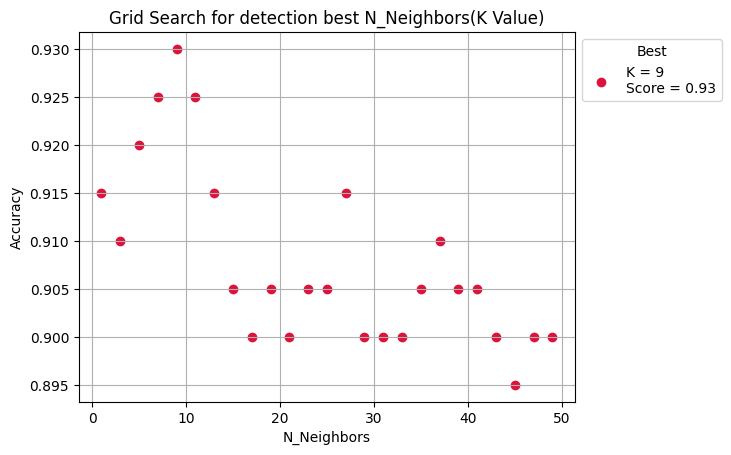

In [24]:
t = [i for i in range(1,50) if i%2 != 0]
sorte = sorted(zip(scores,t))
best = sorte[-1]
plt.scatter(t, scores, color='crimson',label=f"K = {best[1]}\nScore = {best[0]}")
plt.xlabel('N_Neighbors')
plt.ylabel('Accuracy')
plt.title('Grid Search for detection best N_Neighbors(K Value)')
plt.legend(title='Best', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True) 

2. Square Root of N rule

In [25]:
n = int(np.sqrt(len(x_train[1]))//2)
if n%2 ==0 :
    n+=1
minkovski_scores , _ = kfolds(x_train , y_train , x_test , y_test,minkowski2,n_neighbors=n)

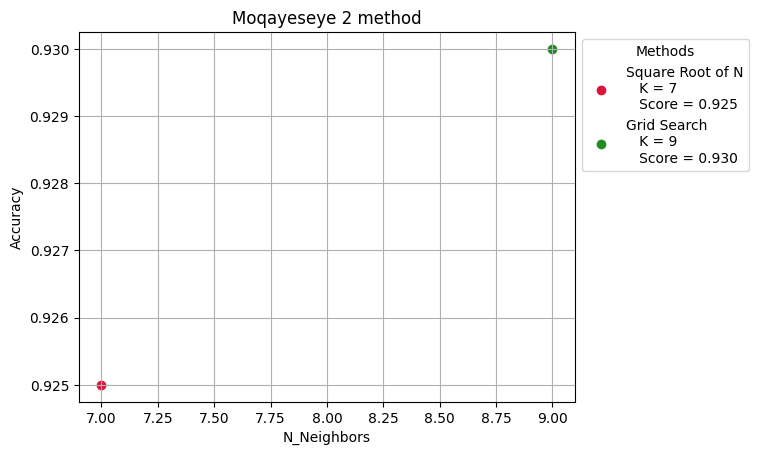

In [26]:
plt.scatter(n, minkovski_scores, color='crimson',label=f"Square Root of N\n   K = {n}\n   Score = {minkovski_scores:0.3f}")
plt.scatter(best[1], best[0], color='forestgreen',label=f"Grid Search\n   K = {best[1]}\n   Score = {best[0]:0.3f}")
plt.xlabel('N_Neighbors')
plt.ylabel('Accuracy')
plt.title('Moqayeseye 2 method')
plt.legend(title='Methods', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True) 

3. Elbow Method

In [27]:
scores = []
for i in range(1,15):
    if i%2 != 0 :
        ec_scores , _ = kfolds(x_train , y_train , x_test , y_test,euclidean,n_neighbors=i,scoring=r2Score)
        scores.append(ec_scores)
t = [i for i in range(1,15) if i%2 != 0]

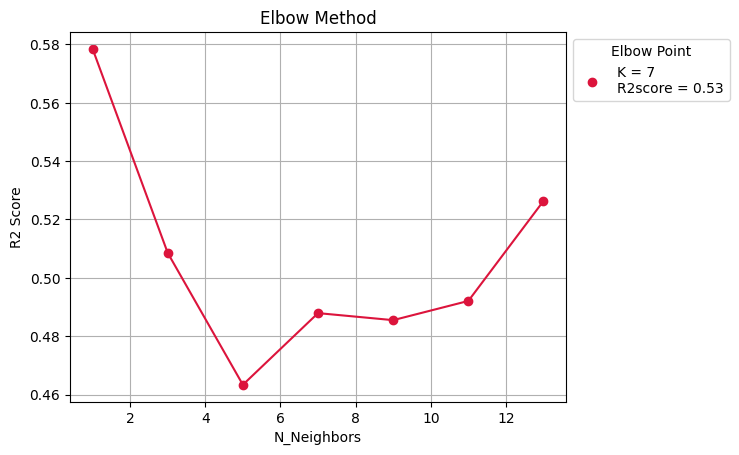

In [28]:
plt.scatter(t, scores, color='crimson',label=f"K = 7 \nR2score = {scores[6]:0.2f}")
plt.plot(t, scores, color='crimson')
plt.xlabel('N_Neighbors')
plt.ylabel('R2 Score')
plt.title('Elbow Method')
plt.legend(title='Elbow Point', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True) 

# Improved KNN

In [29]:
def ImprovedKnn(x_train , y_train , x_test , y_test,n_neighbors=5,scoring =accurancy):
    error = []
    for i in range(10):
        
        xtrain , xtest , ytrain , ytest= np.array(x_train[i]) , np.array(x_test[i]) , np.array(y_train[i]) , np.array(y_test[i])
        y_hat = []
        uniq , counts = np.unique(y_train, return_counts=True)
        maj = uniq[np.argmax(counts)]
        cov = np.cov(xtrain.T)
        distance = [euclidean(xtest[j],xtrain[k]) for j in range(len(xtest)) for k in range(len(xtrain))]
        distances = np.array(distance).reshape(xtest.shape[0], xtrain.shape[0])
        for k in range(len(xtest)):
            sorty = [j for _,j in sorted(zip(distances[k],ytrain))]
            select = sorty[:n_neighbors]
            dis = sorted(distances[k])
            y_hat.append(voting2(select,maj,n_neighbors,dis[:n_neighbors],uniq))
        error.append(scoring(y_hat, ytest))
    kfold_scores = np.sum(error)/10
    return kfold_scores, error

In [30]:
def voting2(selected:list,maj,k,dis,uniq,a=1):
    n_maj = selected.count(maj)
    l_min = np.power(n_maj,a)/k
    w_L = l_min + 1
    scores = {}
    for i in uniq :
        scores[i] = 0
        for j in selected:
            if j == i :
                scores[i] += 1/(dis[selected.index(i)]*w_L)
    return max(scores,key=scores.get)
            
    
    

In [31]:
improved_scores , improved_error = ImprovedKnn(x_train , y_train , x_test , y_test)

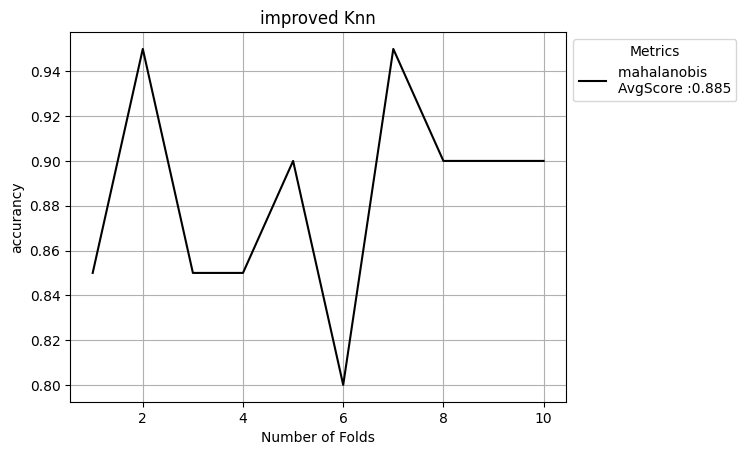

In [32]:

folds= np.arange(1,11)
plt.plot(folds, improved_error , color='black', label=f'mahalanobis \nAvgScore :{improved_scores:0.3f}')
plt.xlabel('Number of Folds')
plt.ylabel('accurancy')
plt.title(f'improved Knn')
plt.legend(title='Metrics', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True) 